# librerias necesarias

In [1]:
#pip install openpyxl
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns

# Exploraciòn de datos

In [2]:
train = pd.read_excel('bike_train.xlsx')

In [3]:
'''Visualizo datos '''
train

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,11995,2012-05-19,2,1,5,23,0,6,0,1,0.60,0.6212,0.56,0.1642,71,168,239
11995,11996,2012-05-20,2,1,5,0,0,0,0,1,0.58,0.5455,0.53,0.1045,42,128,170
11996,11997,2012-05-20,2,1,5,1,0,0,0,1,0.56,0.5303,0.52,0.0000,28,102,130
11997,11998,2012-05-20,2,1,5,2,0,0,0,1,0.56,0.5303,0.52,0.0000,36,62,98


In [4]:
'''Ver valores nulos'''
train.isna().sum().sort_values()

instant       0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
registered    0
workingday    0
holiday       0
hr            0
mnth          0
yr            0
season        0
dteday        0
weekday       0
cnt           0
dtype: int64

In [5]:
'''Tipo de datos'''
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [6]:
'''Inserto una columna pasada'''
train.insert(2, 'Fecha_Registro',train['dteday'].map(date.toordinal))

In [7]:
train.head(1)

,instant,dteday,Fecha_Registro,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [8]:
train.select_dtypes(include=['float64', 'int']).describe()

,instant,Fecha_Registro,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,734391.626219,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,145.218201,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,734138.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,734266.000000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,734392.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,734517.000000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,734643.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


In [9]:
'''Correlaciòn para tomar las variables'''
corr = train.corr()

In [10]:
corr

,instant,Fecha_Registro,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999990,0.118039,0.777284,0.167195,-0.007446,0.008323,0.007103,0.005295,-0.015359,0.029297,0.042490,-0.013275,-0.029001,0.115768,0.238546,0.229814
Fecha_Registro,0.999990,1.000000,0.119277,0.776468,0.168474,-0.009457,0.008254,0.007121,0.005410,-0.015217,0.030437,0.043644,-0.012197,-0.029317,0.115635,0.238038,0.229357
season,0.118039,0.119277,1.000000,-0.446665,0.865268,-0.007610,-0.008928,-0.003688,0.012630,-0.009029,0.410790,0.413196,0.198937,-0.142924,0.119043,0.093595,0.111369
yr,0.777284,0.776468,-0.446665,1.000000,-0.488103,-0.003948,0.001039,-0.002714,0.001068,-0.006309,-0.198929,-0.190360,-0.141319,0.067356,0.053371,0.171910,0.156960
mnth,0.167195,0.168474,0.865268,-0.488103,1.000000,-0.007060,0.009372,0.014500,0.006441,-0.012239,0.353330,0.358541,0.201669,-0.147042,0.078563,0.061686,0.073431
hr,-0.007446,-0.009457,-0.007610,-0.003948,-0.007060,1.000000,0.000414,-0.004037,0.003454,-0.024003,0.139251,0.134633,-0.257202,0.130441,0.285182,0.381933,0.396698
holiday,0.008323,0.008254,-0.008928,0.001039,0.009372,0.000414,1.000000,-0.102503,-0.248601,-0.014707,-0.028519,-0.038005,-0.036672,0.022681,0.022140,-0.044534,-0.030304
weekday,0.007103,0.007121,-0.003688,-0.002714,0.014500,-0.004037,-0.102503,1.000000,0.031057,0.017259,-0.010002,-0.009841,-0.025932,0.008447,0.023687,0.019179,0.022618
workingday,0.005295,0.005410,0.012630,0.001068,0.006441,0.003454,-0.248601,0.031057,1.000000,0.042202,0.062273,0.066305,0.022805,-0.002493,-0.298241,0.134789,0.025132
weathersit,-0.015359,-0.015217,-0.009029,-0.006309,-0.012239,-0.024003,-0.014707,0.017259,0.042202,1.000000,-0.080149,-0.081386,0.430378,0.009195,-0.147903,-0.130223,-0.149848


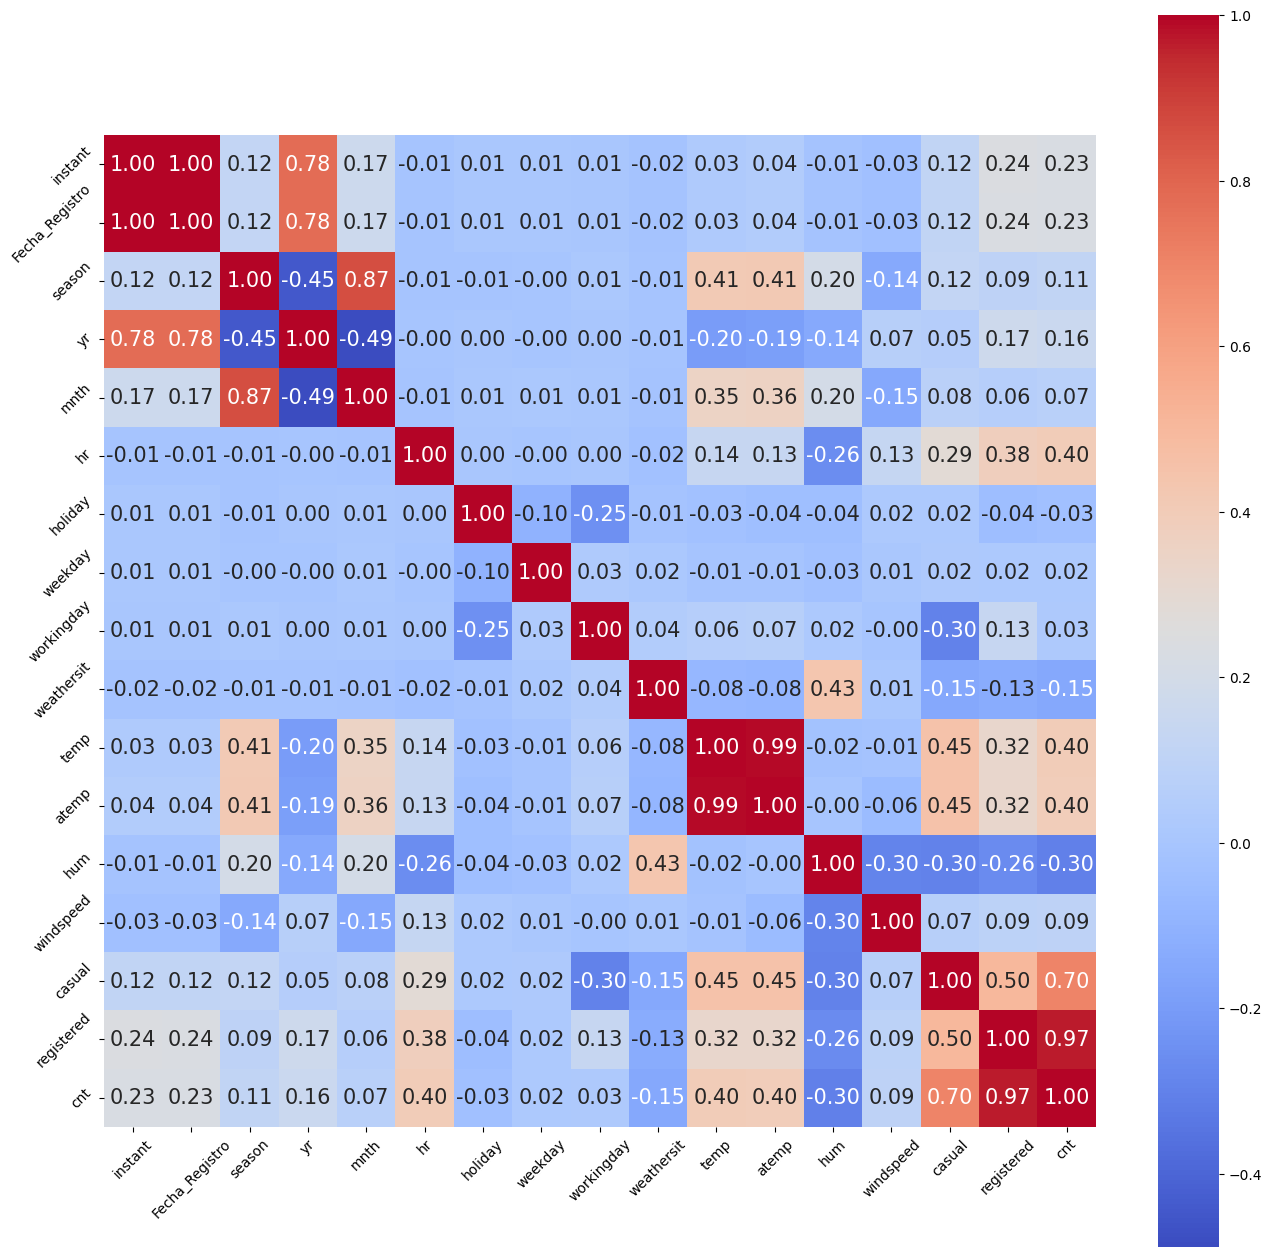

In [10]:
'''Visualizo la correlaciòn de las columnas'''

plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

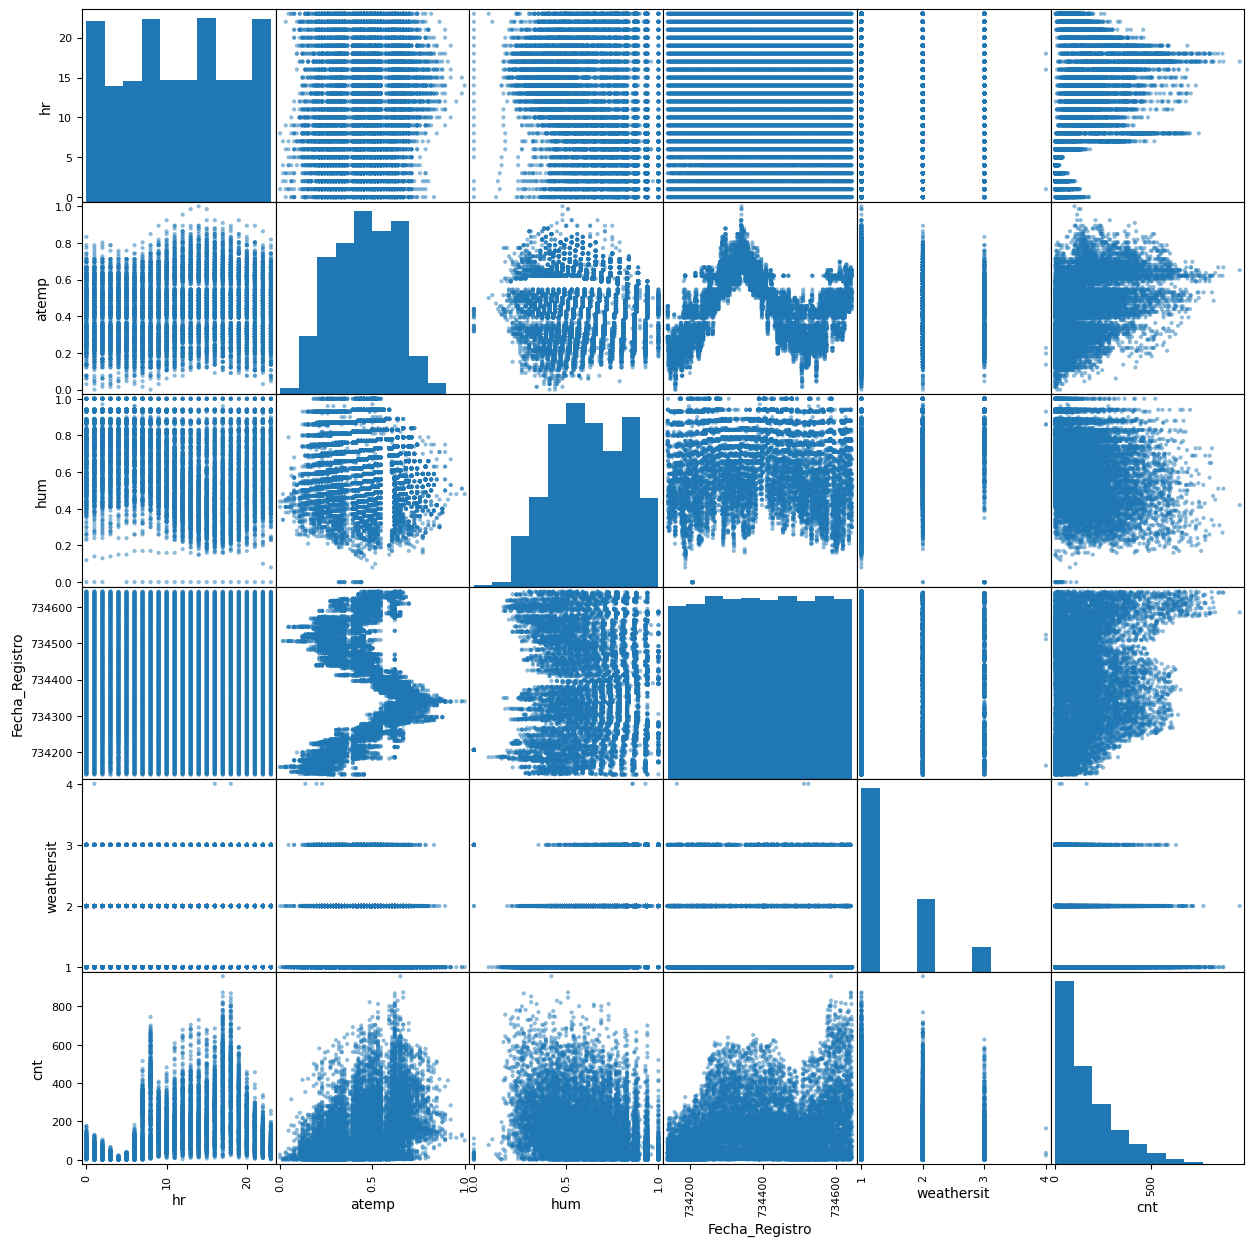

In [27]:
'''Analizo los datos para determinar el modelo'''
pd.plotting.scatter_matrix(train[['hr','atemp', 'hum','Fecha_Registro','weathersit','cnt']],figsize = (15,15))
plt.show()

# Testeo

In [23]:
''''Testeo las columnas con la variable objetivo'''
X = np.array(train[['hr']])
y = np.array(train[['cnt']])
modelo = LinearRegression(fit_intercept=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
modelo.fit(X_train, y_train)
modelo.coef_
y_train_pred = modelo.predict(X_train)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 19231.427486294757


138.67742241004754

In [21]:
X = np.array(train[['hr','atemp']])
y = np.array(train[['cnt']])
modelo = LinearRegression(fit_intercept=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)
modelo.fit(X_train, y_train)
modelo.coef_
y_train_pred = modelo.predict(X_train)
y_train_pred = y_train_pred.astype('int')
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 16430.082361015786


128.1798828249417

In [20]:
X = np.array(train[['hr','atemp', 'hum']])
y = np.array(train[['cnt']])
modelo = LinearRegression(fit_intercept=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)
modelo.fit(X_train, y_train)
modelo.coef_
y_train_pred = modelo.predict(X_train)
y_train_pred = y_train_pred.astype('int')
print('El error de datos de training:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

El error de datos de training: 15318.40827532111


123.76755744265583

In [19]:

X = np.array(train[['hr','atemp','Fecha_Registro']])
y = np.array(train[['cnt']])
modelo = LinearRegression(fit_intercept=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)
modelo.fit(X_train, y_train)
modelo.coef_
y_train_pred = modelo.predict(X_train)
y_train_pred = y_train_pred.astype('int')
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 15379.71516815374


124.01497961195551

In [42]:
X  = np.array(train[['hr','atemp', 'hum','Fecha_Registro']])
y = np.array(train[['cnt']])
modelo = LinearRegression(fit_intercept=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)
modelo.fit(X_train, y_train)
modelo.coef_
y_train_pred = modelo.predict(X_train)
y_train_pred = y_train_pred.astype('int')
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 14307.642808118442


119.61455934842732

In [43]:
test = pd.read_excel('bike_test.xlsx')

In [44]:
test

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,12000,2012-05-20,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896
1,12001,2012-05-20,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045
2,12002,2012-05-20,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343
3,12003,2012-05-20,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940
4,12004,2012-05-20,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
5376,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
5377,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
5378,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   int64         
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   int64         
 3   yr          5380 non-null   int64         
 4   mnth        5380 non-null   int64         
 5   hr          5380 non-null   int64         
 6   holiday     5380 non-null   int64         
 7   weekday     5380 non-null   int64         
 8   workingday  5380 non-null   int64         
 9   weathersit  5380 non-null   int64         
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 588.6 KB


In [46]:
test.insert(2, 'Fecha_Registro',test['dteday'].map(date.toordinal))

In [47]:
test.head(1)

,instant,dteday,Fecha_Registro,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,12000,2012-05-20,734643,2,1,5,4,0,0,0,1,0.52,0.5,0.68,0.0896


In [48]:
'''Tomo las variables para predecir'''
X_test = np.array(test[['hr','atemp', 'hum','Fecha_Registro']])

In [49]:
y_test_pred = modelo.predict(X_test)

In [50]:
y_test_pred

array([[171.09803257],
       [166.12747455],
       [187.75529849],
       ...,
       [269.19982853],
       [286.97399974],
       [278.18023132]])

In [62]:
'''Creo un Dataframe para guardar la predicciòn'''
Sik1901 = pd.DataFrame()
Sik1901['pred'] = pd.DataFrame(y_test_pred)
Sik1901['pred'] = Sik1901['pred'].astype('int')

In [64]:
Sik1901

,pred
0,171
1,166
2,187
3,190
4,226
...,...
5375,256
5376,262
5377,269
5378,286


In [61]:
Sik1901.describe()

,pred
count,5380.000000
mean,262.710409
std,79.807065
min,65.000000
25%,194.000000
50%,266.000000
75%,330.000000
max,452.000000


In [56]:
Sik1901.to_csv('Sik1901.csv', index = False)